In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\srish\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.shape

(768, 9)

Text(0.5, 1.0, 'Class Distributions \n (0: No Diabetes || 1: Diabetes)')

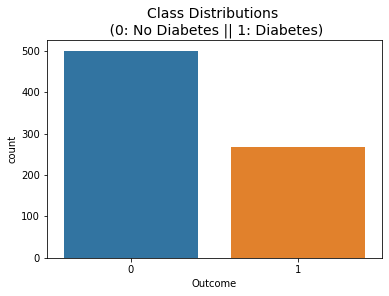

In [7]:
sns.countplot('Outcome', data=df)
plt.title('Class Distributions \n (0: No Diabetes || 1: Diabetes)', fontsize=14)

In [8]:
# The classes are heavily skewed we need to solve this issue later.
print('No Diabetes', round(df['Outcome'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Diabetes', round(df['Outcome'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Diabetes 65.1 % of the dataset
Diabetes 34.9 % of the dataset


#### not treating the outliers

In [9]:
X = df.drop(["Outcome"],axis=1)
y = df.Outcome

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=1)

In [12]:
from sklearn.naive_bayes import GaussianNB

In [13]:
NB = GaussianNB()

In [14]:
NB.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [15]:
pred = NB.predict(x_test)

In [16]:
from sklearn.metrics import accuracy_score,roc_curve,confusion_matrix

In [17]:
print(accuracy_score(y_test,pred))

0.7916666666666666


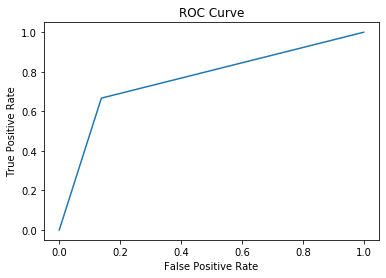

In [18]:
fpr, tpr, thresholds = roc_curve(y_test, pred)
# Plot ROC curve
#plt.plot([0, 1], [0, 1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       123
           1       0.73      0.67      0.70        69

    accuracy                           0.79       192
   macro avg       0.78      0.76      0.77       192
weighted avg       0.79      0.79      0.79       192



In [20]:
import statsmodels.api as sm

In [21]:
logm1 = sm.GLM(y_train,(sm.add_constant(x_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  576
Model:                            GLM   Df Residuals:                      567
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -273.07
Date:                Mon, 08 Jun 2020   Deviance:                       546.13
Time:                        18:59:04   Pearson chi2:                     565.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -8.1521      0.810    -10.068      0.000      -9.739      -6.565
Pregnancies                  0.1181      0.037      3.230      0.001       0.046       0.190
Glucose                      0.0354      0.004      8.191      0.000       0.027       0.044
BloodPressure               -0.0146      0.006     -2.543      0.011      -0.026      -0.003
SkinThickness               -0.0027      0.008     -0.336      0.737      -0.019       0.013
Insulin                     -0.0007      0.001     -0.658      0.510      -0.003       0.001
BMI                          0.0915      0.018      5.214      0.000       0.057       0.126
DiabetesPedigreeFunction     0.5957      0.334      1.781      0.075      -0.060       1.251
Age                          0.0138      0.011      1.286      0.198      -0.007       0.035
============================================================================================
"""

In [22]:
# feature selection with RFE

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 2)            
rfe = rfe.fit(X,y)
print(rfe.support_)           
print(rfe.ranking_)           


C:\Users\srish\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[ True False False False False False  True False]
[1 3 5 6 7 2 1 4]


### There is no hyperparameter tuning in Naive Bayes